In [1]:
import matplotlib.pyplot as plt
import numpy as np


def gaussian(mu, sigma, x, N, dx):

    return (
        np.exp(-((x - mu) ** 2) / (2 * sigma**2))
        / (sigma * np.sqrt(2 * np.pi))
        * N
        * dx
    )

### 1)

In [501]:
def plot(N):

    fig = plt.figure(figsize=(7, 5))
    ax = plt.gca()

    sigma = 2
    mu = 10
    N = N
    dx = 0.5
    M = 3

    samples = np.random.normal(mu, sigma, N)
    counts, bins, _ = ax.hist(
        samples, bins=np.arange(np.min(samples), np.max(samples) + dx, dx)
    )

    errors = np.sqrt(counts)
    errors[errors == 0] = 1
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    non_zero = np.where(counts != 0)
    counts_non_zero = counts[non_zero]
    bin_centers_non_zero = bin_centers[non_zero]
    errors_non_zero = errors[non_zero]

    errorBars = ax.errorbar(
        bin_centers_non_zero, counts_non_zero, yerr=errors_non_zero, fmt=".", capsize=4
    )

    x = np.linspace(np.min(samples), np.max(samples) + dx, 1000000)
    y = gaussian(mu, sigma, x, N, dx)
    plt.plot(x, y)

    center = len(bins) // 2
    central_bins = bins[center - 5 : center + 5]
    central_bin_counts = counts[center - 5 : center + 5]
    true_counts = gaussian(mu, sigma, bin_centers[center - 5 : center + 5], N, dx)

    print((true_counts - central_bin_counts).astype(np.int64))

    x2 = np.sum(
        ((central_bin_counts - true_counts) / errors[center - 5 : center + 5]) ** 2
    ) / (10 - M)

    print("Reduced Chi-Square:", x2)

    ax.text(0.85, 0.9, r"$\chi^{2}$ = " + str(x2)[0:4], transform=ax.transAxes)
    ax.set_xlabel("X")
    ax.set_ylabel("Count")

    fig.savefig("chi_squared_" + str(N) + ".png", dpi=300)
    plt.show()

[ 0 -2  1  1  0  3  0  0 -2  0]
Reduced Chi-Square: 0.7692927993080518


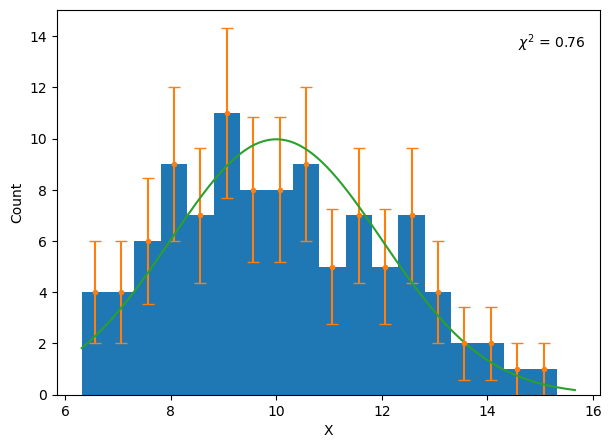

[ 69 400 332 465  59 257  76 -86 175 -43]
Reduced Chi-Square: 1.0183167778761166


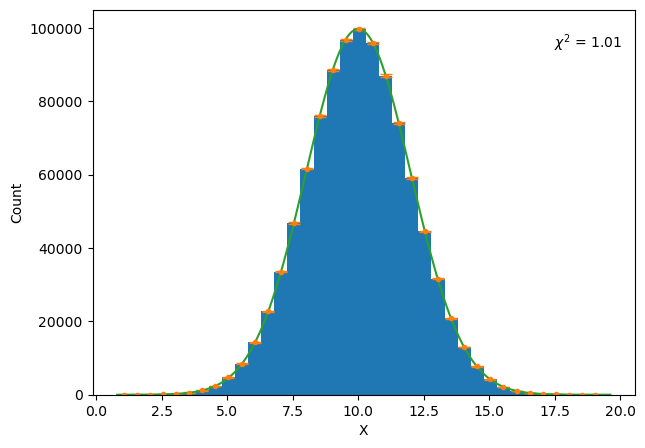

In [502]:
plot(100)
plot(1000000)

### 2a)

In [76]:
H0 = 72  # km/s/Mpc

true_distances = np.cbrt(2000**3 * np.random.rand(100))
mean_distance = np.mean(true_distances)
print("Mean Distance:", mean_distance, "Mpc")

Mean Distance: 1515.3125364627963 Mpc


### 2b)

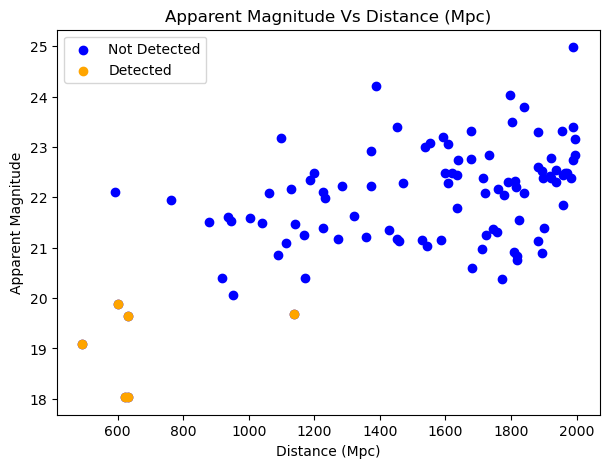

Average of all magnitudes: -18.897710474050164
Average of detected magnitudes: -20.038750133044033


In [77]:
absolute_magnitudes = -19 + np.random.normal(0, 1, 100)
apparent_magnitudes = absolute_magnitudes + 5 * np.log10(true_distances * 1e6 / 10)

detected = np.where(apparent_magnitudes <= 20)
absolute_magnitudes_detected = absolute_magnitudes[detected]
apparent_magnitudes_detected = apparent_magnitudes[detected]
distances_detected = true_distances[detected]

fig = plt.figure(figsize=(7, 5))
ax = fig.gca()
ax.scatter(true_distances, apparent_magnitudes, color="blue", label="Not Detected")
ax.scatter(
    distances_detected, apparent_magnitudes_detected, color="orange", label="Detected"
)
ax.legend()
ax.set_title("Apparent Magnitude Vs Distance (Mpc)")
ax.set_xlabel("Distance (Mpc)")
ax.set_ylabel("Apparent Magnitude")
plt.show()

print("Average of all magnitudes:", np.mean(absolute_magnitudes))
print("Average of detected magnitudes:", np.mean(absolute_magnitudes_detected))

### 2c)

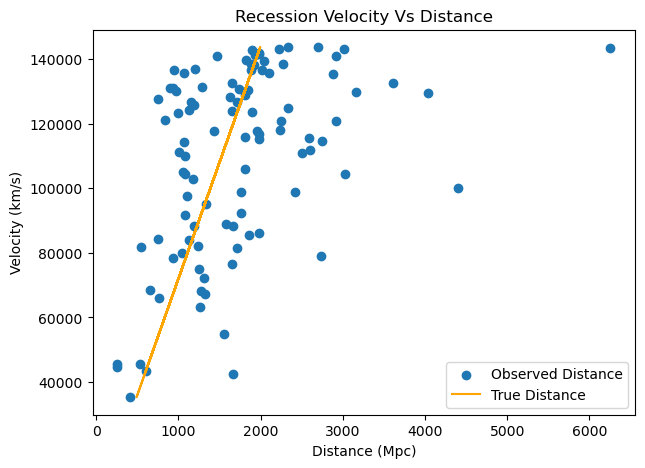

In [78]:
velocities = H0 * true_distances
obs_distances = 10 * 10 ** (1 / 5 * (apparent_magnitudes - -19)) / (1e6)

fig = plt.figure(figsize=(7, 5))
ax = fig.gca()

ax.scatter(obs_distances, velocities, label="Observed Distance")
ax.plot(true_distances, velocities, color="orange", label="True Distance")
ax.legend()
ax.set_xlabel("Distance (Mpc)")
ax.set_ylabel("Velocity (km/s)")
ax.set_title("Recession Velocity Vs Distance")
plt.show()

The variation in apparent magnitude leads to misleading estimates for the distance of celestial objects. Furthermore, the magnitude limit of sky surveys results in over-identification of bright objects as distance increases.

### 3)

In [79]:
planet = 0.01
no_planet = 0.99
det_planet = 0.90
no_det_planet = 0.1
det_no_planet = 0.03
no_det_no_plnet = 0.97

planet_det = (det_planet * planet) / (det_planet * planet + det_no_planet * no_planet)

In [33]:
planet_det

0.23255813953488375

The probability of correctly detecting a planet is 23.26%

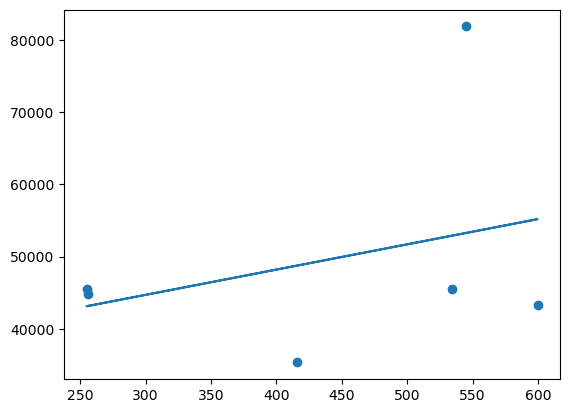

In [80]:
x = obs_distances[detected]
y = velocities[detected]
m, b = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)
plt.plot(x, yp)
plt.scatter(x, y)

In [35]:
print("Our approximated value for the Hubble Constant is:", m)

Our approximated value for the Hubble Constant is: 173.28520638464076


In [85]:
import datetime

from astropy import units as u
from astropy.coordinates import Angle, EarthLocation
from astropy.time import Time

observing_location = EarthLocation(lat=40.1105 * u.deg, lon=-88.2284 * u.deg)
observing_time = Time(
    datetime.datetime.utcnow(),
    scale="utc",
    location=observing_location,
)
LST = observing_time.sidereal_time("mean")

In [71]:
# LST = np.array(LST)
print(LST)
type(LST)

1h45m32.85862302s


astropy.coordinates.angles.Longitude

In [82]:
num = 15 * 42 / 60 - (360 - 88) - 100
denom = 15 * 15 / 3600

num / denom

-5784.0

In [111]:
lat = 40.1105
ra = 62 / 60 + 44.3 / 3600

# lat *= np.pi / 180

dec = 41 * 15 + 15 * 16 / 60 + 15 * 9 / 3600
# dec *= np.pi / 180

H = Angle(
    np.arccos(-np.sin(dec) * np.sin(lat) / np.cos(dec) * np.cos(lat)) * u.rad
).hourangle

In [112]:
H

5.725001356990465

In [114]:
ra

1.045638888888889

In [115]:
15 * 88

1320

In [116]:
H + ra

6.770640245879354

In [117]:
0.77 * 60

46.2

In [119]:
72 * 6.3e3 / 3e5

1.512

In [ ]:
c 